Without Gaussian Noise

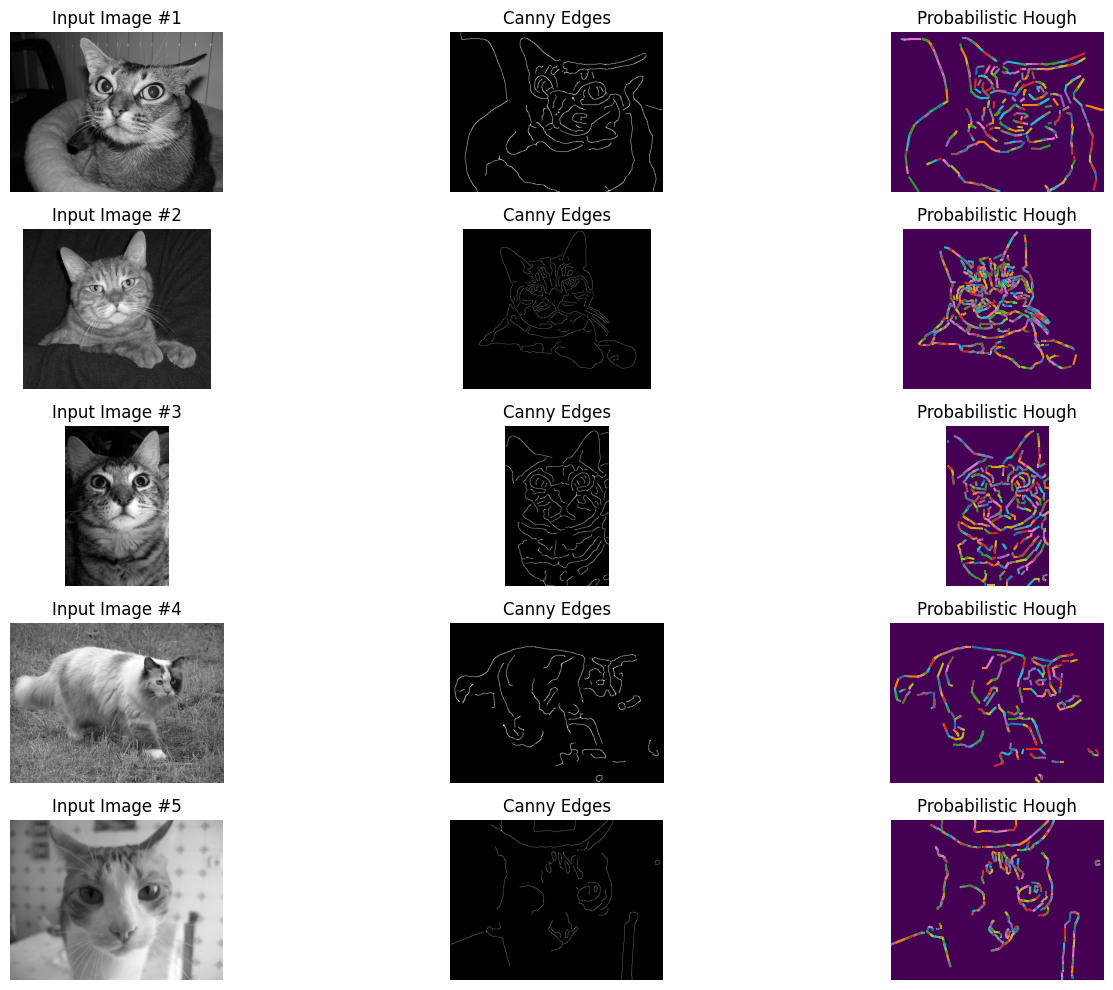

In [30]:
import os
from skimage.transform import probabilistic_hough_line
from skimage import io
from skimage.feature import canny
from skimage.draw import line
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from matplotlib import cm
from skimage.util import img_as_ubyte

path = './data'
images_names = os.listdir(path)
images = []
edges = []
lines = []

for name in images_names:
    image = io.imread(path+'/'+name)
    image = rgb2gray(image)
    image = img_as_ubyte(image)
    edge = canny(image, 5, 1, 25)
    prob_lines = probabilistic_hough_line(edge, threshold=10, line_length=5,line_gap=3)
    images.append(image)
    edges.append(edge)
    lines.append(prob_lines)

fig, ax = plt.subplots(len(images_names), 3, figsize=(15, 10), sharex=False, sharey=False, squeeze=False)

for i in range(len(images_names)):
    ax[i][0].imshow(images[i], cmap=cm.gray)
    ax[i][0].set_title('Input Image #'+str(i+1))

    ax[i][1].imshow(edges[i], cmap=cm.gray)
    ax[i][1].set_title('Canny Edges')

    ax[i][2].imshow(edges[i] * 0)
    for line in lines[i]:
        p0, p1 = line
        ax[i][2].plot((p0[0], p1[0]), (p0[1], p1[1]))
    ax[i][2].set_xlim((0, images[i].shape[1]))
    ax[i][2].set_ylim((images[i].shape[0], 0))
    ax[i][2].set_title('Probabilistic Hough')

    ax[i][0].set_axis_off()
    ax[i][1].set_axis_off()
    ax[i][2].set_axis_off()

plt.tight_layout()
plt.show()

With Gaussian Noise

C:\Users\rkbij\AppData\Local\Temp\ipykernel_13376\1727709501.py:21: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  image = random_noise(image, mode='gaussian', seed=25, clip=True)


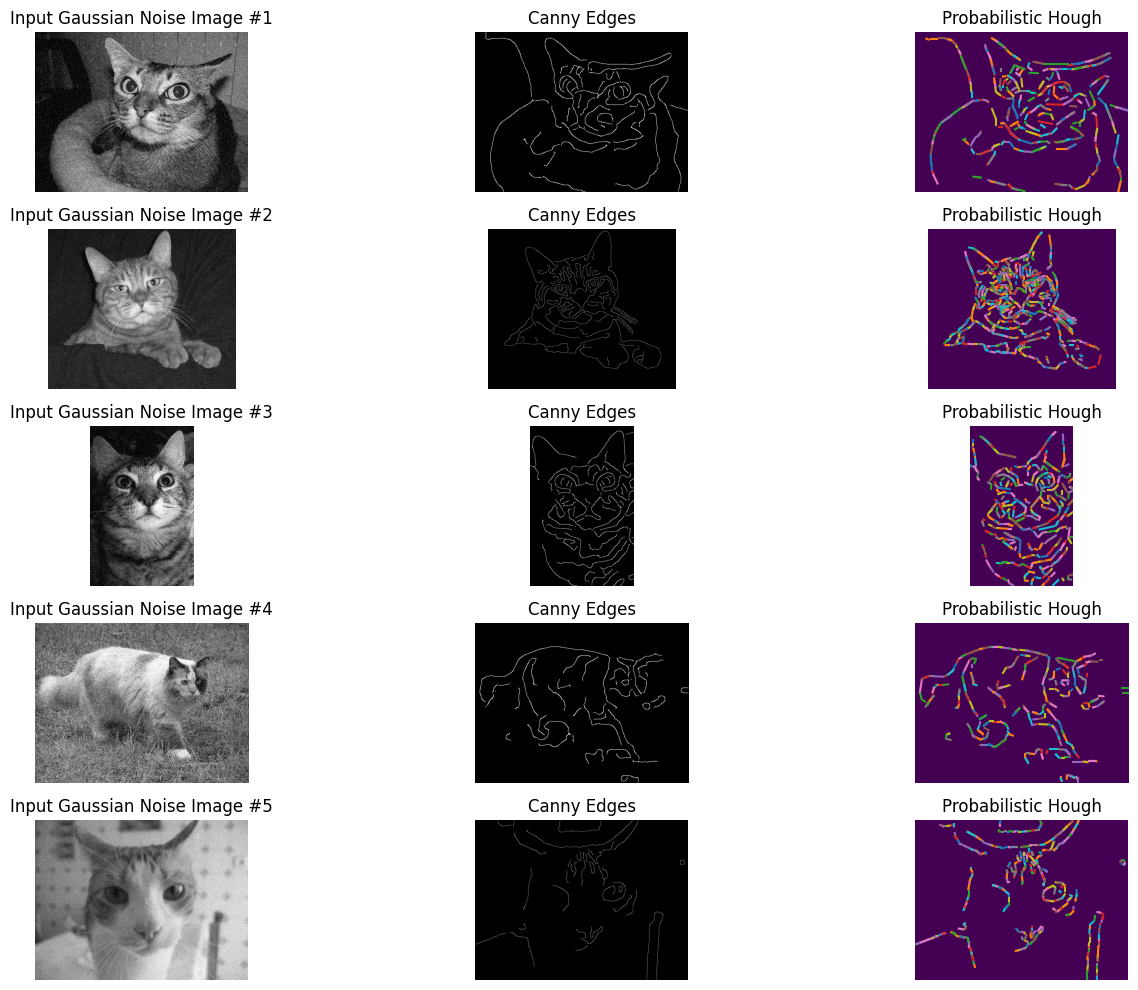

In [31]:
import os
from skimage.transform import probabilistic_hough_line
from skimage import io
from skimage.feature import canny
from skimage.draw import line
from skimage.util import random_noise
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from matplotlib import cm
from skimage.util import img_as_ubyte

path = './data'
images_names = os.listdir(path)
images = []
edges = []
lines = []

for name in images_names:
    image = io.imread(path+'/'+name)
    image = rgb2gray(image)
    image = random_noise(image, mode='gaussian', seed=25, clip=True)
    image = img_as_ubyte(image)
    edge = canny(image, 5, 1, 25)
    prob_lines = probabilistic_hough_line(edge, threshold=10, line_length=5,line_gap=3)
    images.append(image)
    edges.append(edge)
    lines.append(prob_lines)

fig, ax = plt.subplots(len(images_names), 3, figsize=(15, 10), sharex=False, sharey=False, squeeze=False)

for i in range(len(images_names)):
    ax[i][0].imshow(images[i], cmap=cm.gray)
    ax[i][0].set_title('Input Gaussian Noise Image #'+str(i+1))

    ax[i][1].imshow(edges[i], cmap=cm.gray)
    ax[i][1].set_title('Canny Edges')

    ax[i][2].imshow(edges[i] * 0)
    for line in lines[i]:
        p0, p1 = line
        ax[i][2].plot((p0[0], p1[0]), (p0[1], p1[1]))
    ax[i][2].set_xlim((0, images[i].shape[1]))
    ax[i][2].set_ylim((images[i].shape[0], 0))
    ax[i][2].set_title('Probabilistic Hough')

    ax[i][0].set_axis_off()
    ax[i][1].set_axis_off()
    ax[i][2].set_axis_off()

plt.tight_layout()
plt.show()